In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing #
import warnings
warnings.filterwarnings('ignore')
# from datetime import datetime

C:\Users\Saqlain\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
cc=pd.read_excel(r'C:\Users\Saqlain\Downloads\CocaCola_Sales_Rawdata.xlsx')
cc.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# Time series plot

<AxesSubplot:>

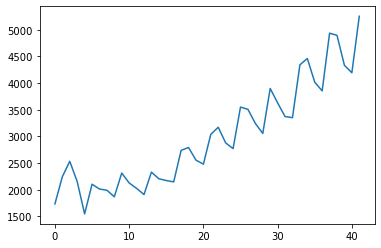

In [3]:
cc.Sales.plot()

# ACF and PACF plots

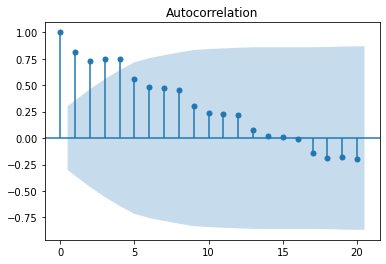

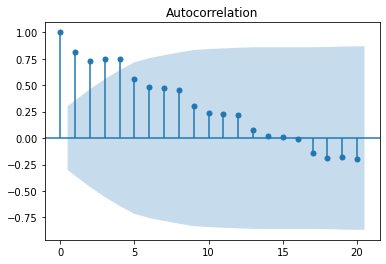

In [4]:
#ACF
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cc.Sales, lags = 20)

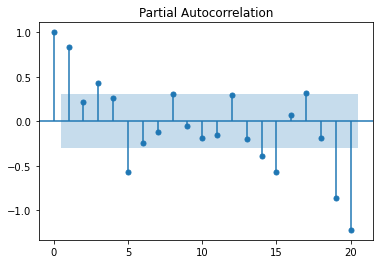

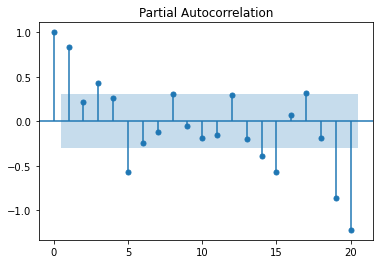

In [5]:
# PACF
tsa_plots.plot_pacf(cc.Sales, lags=20)

# Time series decomposition of data
To understand underlying patterns such as trend, seasonality, cycle and irregular remainder.

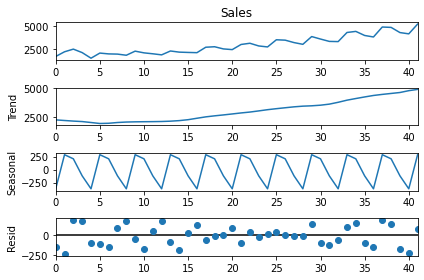

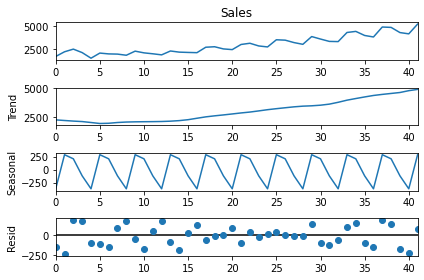

In [6]:
#additive seasonality decomposition plot
decompose_ts_add = seasonal_decompose(cc.Sales, model = "additive", period = 4, extrapolate_trend=4) #4 quarters
decompose_ts_add.plot()

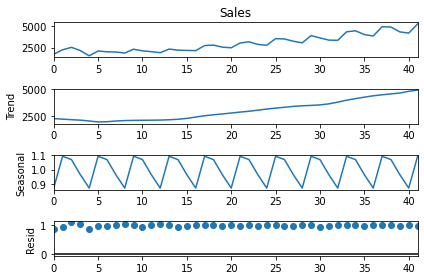

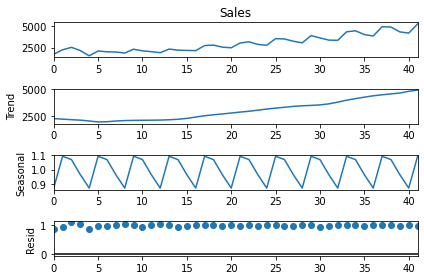

In [7]:
# multiplicative seasonality decomposition plot
decompose_ts_mul = seasonal_decompose(cc.Sales, model = "multiplicative", period = 4, extrapolate_trend=4)
decompose_ts_mul.plot()

- It is clearly evident that there is an overall increasing trend in the data but no seasonal variations. However, it might not always be possible to make such visual inferences.
- we can check stationarity by Plotting Rolling Statistics
- We can plot the moving average or moving variance and see if it varies with time.
- By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last Quarter, i.e. last 3 months. But again this is more of a visual technique.
- We will take moving average of different time periods i.e. 3,6,9, and 12 months as shown below.
- Here, moving average is shown in orange and actual series in blue.

# Rolling Statistics

In [8]:
sales_count = cc['Sales']

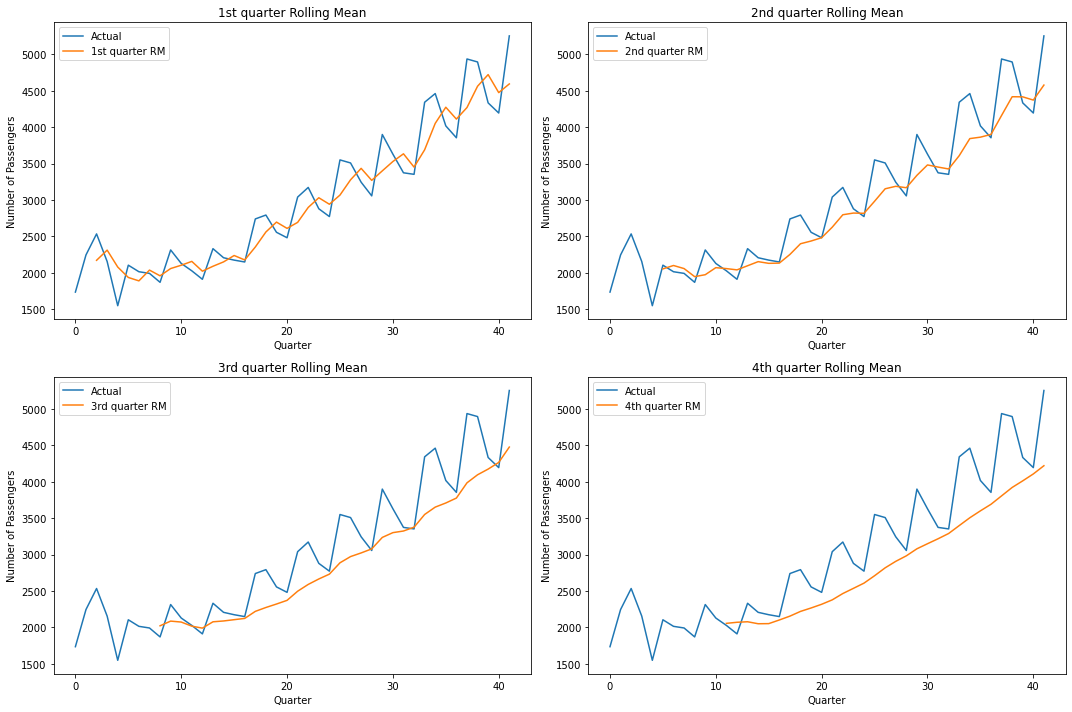

In [9]:
fig,axes = plt.subplots(2,2)
fig.set_figheight(10)
fig.set_figwidth(15)
axes[0][0].plot(cc.index,sales_count,label='Actual')
axes[0][0].plot(cc.index,sales_count.rolling(window=3).mean(),label='1st quarter RM')
axes[0][0].set_xlabel('Quarter')
axes[0][0].set_ylabel('Number of Passengers')
axes[0][0].set_title('1st quarter Rolling Mean')
axes[0][0].legend(loc='best')

axes[0][1].plot(cc.index,sales_count,label='Actual')
axes[0][1].plot(cc.index,sales_count.rolling(window=6).mean(),label='2nd quarter RM')
axes[0][1].set_xlabel('Quarter')
axes[0][1].set_ylabel('Number of Passengers')
axes[0][1].set_title('2nd quarter Rolling Mean')
axes[0][1].legend(loc='best')

axes[1][0].plot(cc.index,sales_count,label='Actual')
axes[1][0].plot(cc.index,sales_count.rolling(window=9).mean(),label='3rd quarter RM')
axes[1][0].set_xlabel('Quarter')
axes[1][0].set_ylabel('Number of Passengers')
axes[1][0].set_title('3rd quarter Rolling Mean')
axes[1][0].legend(loc='best')

axes[1][1].plot(cc.index,sales_count,label='Actual')
axes[1][1].plot(cc.index,sales_count.rolling(window=12).mean(),label='4th quarter RM')
axes[1][1].set_xlabel('Quarter')
axes[1][1].set_ylabel('Number of Passengers')
axes[1][1].set_title('4th quarter Rolling Mean')
axes[1][1].legend(loc='best')
plt.tight_layout()
plt.show()

# Seasonality

Let us see how many CocoCola Sales happened, on a month on month basis. We will plot a stacked annual plot to observe seasonality in our
data.


In [10]:
#Converting the 'Month' column into proper date time format
dates = pd.date_range(start='1986-01-01', freq='Q',periods=len(cc))

In [11]:
cc['Month'] = dates.month
cc['Year'] = dates.year

In [12]:
cc_sea= cc.iloc[:,1:]

In [13]:
#To get the names of the month
cc_sea.dtypes

Sales    float64
Month      int64
Year       int64
dtype: object

In [14]:
cc.head()

,Quarter,Sales,Month,Year
0,Q1_86,1734.827000,3,1986
1,Q2_86,2244.960999,6,1986
2,Q3_86,2533.804993,9,1986
3,Q4_86,2154.962997,12,1986
4,Q1_87,1547.818996,3,1987


In [15]:
import calendar
cc_sea['Month'] = cc_sea['Month'].apply(lambda x: calendar.month_abbr[x])
#df.rename({'#Passengers':'Passengers'},axis=1,inplace=True)
cc_sea = cc_sea[['Month','Year','Sales']]
cc_sea

,Month,Year,Sales
0,Mar,1986,1734.827000
1,Jun,1986,2244.960999
2,Sep,1986,2533.804993
3,Dec,1986,2154.962997
4,Mar,1987,1547.818996
5,Jun,1987,2104.411995
6,Sep,1987,2014.362999
7,Dec,1987,1991.746998
8,Mar,1988,1869.049999
9,Jun,1988,2313.631996


In [16]:
# plotting sales quaterly
monthly = pd.pivot_table(data=cc_sea,values='Sales',index='Month',columns='Year')
monthly = monthly.reindex(index=['Mar','Jun','Sep','Dec'])
monthly

Year,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996
Month,,,,,,,,,,,
Mar,1734.827000,1547.818996,1869.049999,1910.603996,2148.278000,2480.973999,2772.000000,3056.0,3352.0,3854.0,4194.0
Jun,2244.960999,2104.411995,2313.631996,2331.164993,2739.307999,3039.522995,3550.000000,3899.0,4342.0,4936.0,5253.0
Sep,2533.804993,2014.362999,2128.320000,2206.549995,2792.753998,3172.115997,3508.000000,3629.0,4461.0,4895.0,NaN
Dec,2154.962997,1991.746998,2026.828999,2173.967995,2556.009995,2879.000999,3243.859993,3373.0,4017.0,4333.0,NaN


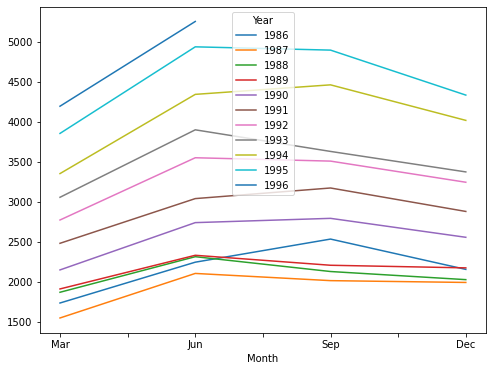

In [17]:
#monthly passengers
monthly.plot(figsize=(8,6))
plt.show()

In [18]:
#plotting sales Quaterly
yearly = pd.pivot_table(data=cc_sea,values='Sales',index='Year',columns='Month')
yearly = yearly[['Mar','Jun','Sep','Dec']]
yearly

Month,Mar,Jun,Sep,Dec
Year,,,,
1986,1734.827000,2244.960999,2533.804993,2154.962997
1987,1547.818996,2104.411995,2014.362999,1991.746998
1988,1869.049999,2313.631996,2128.320000,2026.828999
1989,1910.603996,2331.164993,2206.549995,2173.967995
1990,2148.278000,2739.307999,2792.753998,2556.009995
1991,2480.973999,3039.522995,3172.115997,2879.000999
1992,2772.000000,3550.000000,3508.000000,3243.859993
1993,3056.000000,3899.000000,3629.000000,3373.000000
1994,3352.000000,4342.000000,4461.000000,4017.000000


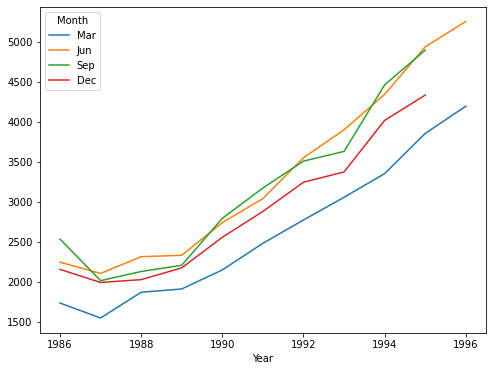

In [19]:
#plotting passengers yearly
yearly.plot(figsize=(8,6))
plt.show()

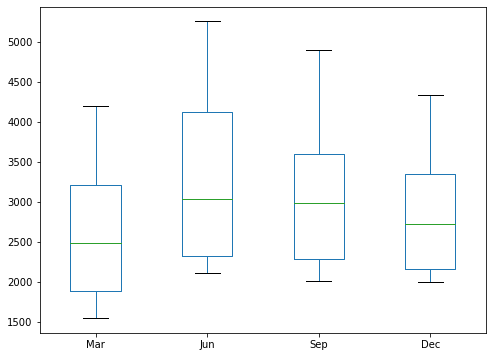

In [20]:
yearly.plot(kind='box',figsize=(8,6))
plt.show()

# Important Inferences
- The sales are increasing without fail every year.
- Jun and Sep are the peak Quarter for Sales. This where sales remain constantly high for the year.
- We can see a seasonal cycle between jun and sep the mean value of each quarter starts with a increasing trend in the 2nd quarter (JunAug) and drops down towards last quarter (Dec-feb). We can see a seasonal effect with a cycle of 6 months.


# Transformation


In [21]:
from numpy import sqrt
from pandas import DataFrame

In [22]:
cc_sea.head()

,Month,Year,Sales
0,Mar,1986,1734.827000
1,Jun,1986,2244.960999
2,Sep,1986,2533.804993
3,Dec,1986,2154.962997
4,Mar,1987,1547.818996


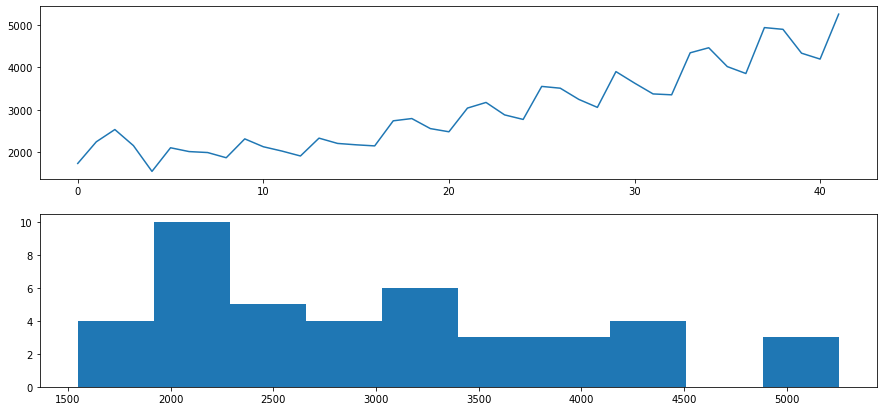

In [23]:
# Plot before transformation
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(cc_sea['Sales'])
# histogram
plt.subplot(212)
plt.hist(cc_sea['Sales'])
plt.show()

# Square Root Transform

In [24]:
dataframe = DataFrame(cc_sea['Sales'].values)
dataframe.columns = ['Sales']
dataframe['Sales'] = sqrt(dataframe['Sales'])

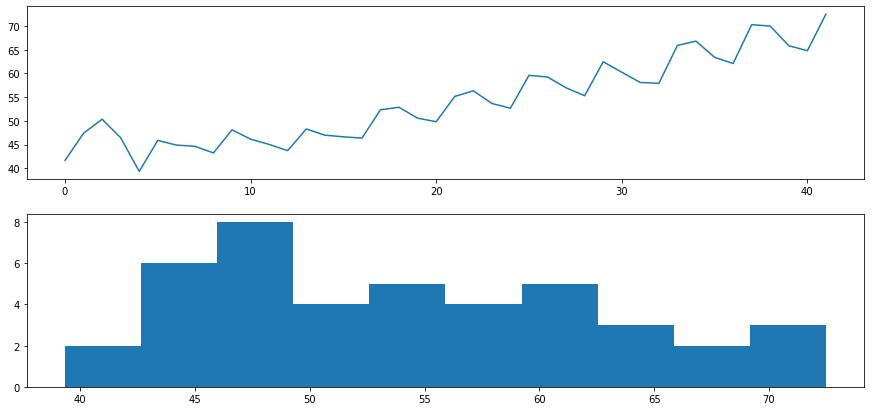

In [25]:
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

# Log Transform

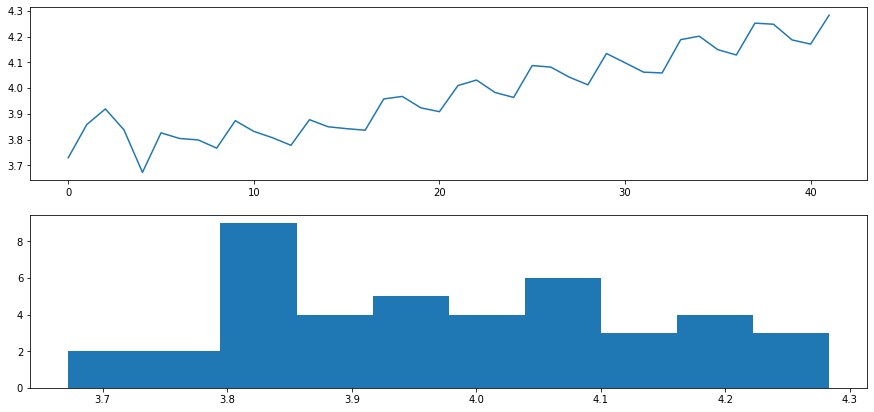

In [26]:
from numpy import log
dataframe = DataFrame(cc_sea['Sales'].values)
dataframe.columns = ['Sales']
dataframe['Sales'] = log(dataframe['Sales'])
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

# Data Driven Approaches

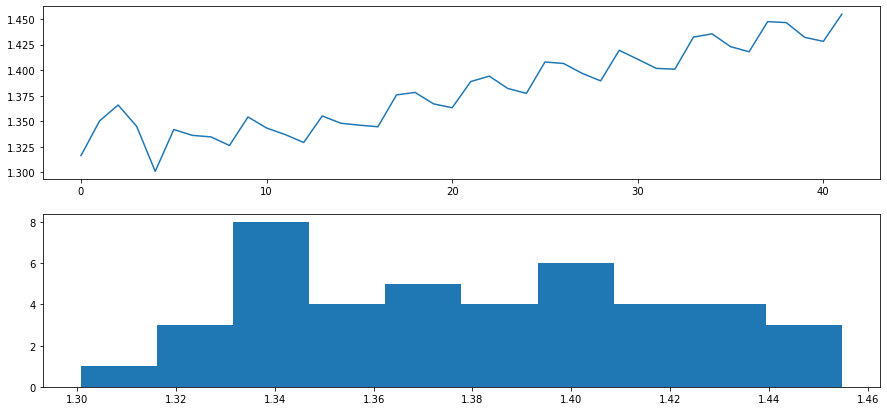

In [27]:
from numpy import log
dataframe = DataFrame(cc_sea['Sales'].values)
dataframe.columns = ['Sales']
dataframe['Sales'] = log(dataframe['Sales'])
plt.figure(figsize=(15,7))
# line plot
plt.subplot(211)
plt.plot(dataframe['Sales'])
# histogram
plt.subplot(212)
plt.hist(dataframe['Sales'])
plt.show()

# Data Driven Approaches

In [28]:
# Splitting Train and Test
Train = cc.head(38)
Test = cc.tail(4) # Recent 4 time period values are Test data

In [29]:
# Creating a function to calculate the MAPE value for test data
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)


In [30]:
# Simple Exponential Method
ses_model = SimpleExpSmoothing(Train["Sales"]).fit()
pred_ses = ses_model.predict(start = Test.index[0], end = Test.index[-1])
pred_ses_MAPE = MAPE(pred_ses, Test.Sales)
pred_ses_MAPE

8.373345059147068

In [31]:
# Holt method
hw_model = Holt(Train["Sales"]).fit()
pred_hw = hw_model.predict(start = Test.index[0], end = Test.index[-1])
pred_hw_MAPE = MAPE(pred_hw, Test.Sales)
pred_hw_MAPE

10.50648347900432

In [32]:
# Holts winter exponential smoothing with **additive seasonality and additive trend**
hwe_model_add_add = ExponentialSmoothing(Train["Sales"], seasonal = "add", trend = "add", seasonal_periods = 4).fit()
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0], end = Test.index[-1])
pred_hwe_add_add_MAPE = MAPE(pred_hwe_add_add, Test.Sales)
pred_hwe_add_add_MAPE

2.9591656718649717

In [33]:
# Holts winter exponential smoothing with **multiplicative seasonality and additive trend**
hwe_model_mul_add = ExponentialSmoothing(Train["Sales"], seasonal = "mul", trend = "add", seasonal_periods = 4).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0], end = Test.index[-1])
pred_hwe_mul_add_MAPE = MAPE(pred_hwe_mul_add, Test.Sales)
pred_hwe_mul_add_MAPE

2.3791277125037276

In [34]:
#Compare the results
data = {"MODEL":pd.Series(["pred_ses_MAPE","pred_hw_MAPE","pred_hwe_add_add_MAPE","pred_hwe_mul_add_MAPE"]),"RMSE_Values":pd.Series([pred_ses_MAPE,pred_hw_MAPE,pred_hwe_add_add_MAPE,pred_hwe_mul_add_MAPE])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
3,pred_hwe_mul_add_MAPE,2.379128
2,pred_hwe_add_add_MAPE,2.959166
0,pred_ses_MAPE,8.373345
1,pred_hw_MAPE,10.506483


Holts winter exponential smoothing with multiplicative seasonality and additive trend has the least rmse value

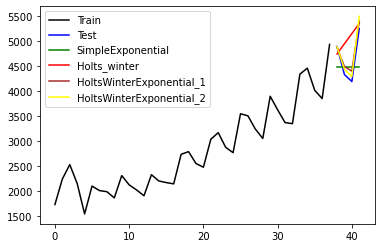

In [35]:
# Visualization of Forecasted values for Test data set using different methods
plt.plot(Train.index, Train["Sales"], label='Train',color="black")
plt.plot(Test.index, Test["Sales"], label='Test',color="blue")
plt.plot(pred_ses.index, pred_ses, label='SimpleExponential',color="green")
plt.plot(pred_hw.index, pred_hw, label='Holts_winter',color="red")
plt.plot(pred_hwe_add_add.index,pred_hwe_add_add,label="HoltsWinterExponential_1",color="brown")
plt.plot(pred_hwe_mul_add.index,pred_hwe_mul_add,label="HoltsWinterExponential_2",color="yellow")
plt.legend(loc='best')

# Getting t, t_squared, log_Sales Transformation

In [38]:
cocacola = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
Quarters = ['Q1','Q2','Q3','Q4']

In [39]:
cocacola["t"] = np.arange(0, 42) #shape of cocacola
cocacola["t_square"] = cocacola["t"]*cocacola["t"] #time
cocacola["log_Sales"] = np.log(cocacola["Sales"]) #log_value of sales

In [74]:
cocacola

,Quarter,Sales,t,t_square,log_Sales,Quarters
0,Q1_86,1734.827000,0,0,7.458663,Q1
1,Q2_86,2244.960999,1,1,7.716443,Q2
2,Q3_86,2533.804993,2,4,7.837477,Q3
3,Q4_86,2154.962997,3,9,7.675529,Q4
4,Q1_87,1547.818996,4,16,7.344602,Q1
5,Q2_87,2104.411995,5,25,7.651791,Q2
6,Q3_87,2014.362999,6,36,7.608058,Q3
7,Q4_87,1991.746998,7,49,7.596767,Q4
8,Q1_88,1869.049999,8,64,7.533186,Q1
9,Q2_88,2313.631996,9,81,7.746574,Q2


In [41]:
p = cocacola["Quarter"][0] #getting dummies for each quarter
p[0:2]

'Q1'

In [42]:
cocacola['Quarters'] = 0
for i in range(41):
    p = cocacola["Quarter"][i]
    cocacola['Quarters'][i]= p[0:2]

In [44]:
Qtr_dummies = pd.DataFrame(pd.get_dummies(cocacola['Quarters']))
cocacola1 = pd.concat([cocacola, Qtr_dummies], axis = 1)
cocacola1.head()

,Quarter,Sales,t,t_square,log_Sales,Quarters,0,Q1,Q2,Q3,Q4
0,Q1_86,1734.827000,0,0,7.458663,Q1,0,1,0,0,0
1,Q2_86,2244.960999,1,1,7.716443,Q2,0,0,1,0,0
2,Q3_86,2533.804993,2,4,7.837477,Q3,0,0,0,1,0
3,Q4_86,2154.962997,3,9,7.675529,Q4,0,0,0,0,1
4,Q1_87,1547.818996,4,16,7.344602,Q1,0,1,0,0,0


# Visualization - Time plot

<AxesSubplot:>

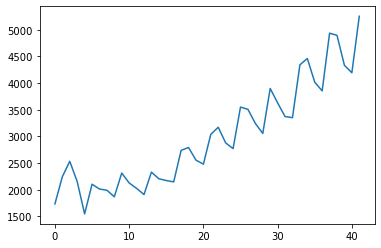

In [45]:
cocacola1.Sales.plot()

In [46]:
# splitting data
Train = cocacola1.head(38)
Test = cocacola1.tail(4)

In [49]:
####################### L I N E A R ##########################
import statsmodels.formula.api as smf
linear_model = smf.ols('Sales ~ t', data=Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(pred_linear))**2))
rmse_linear

591.553295722394

In [51]:
##################### Exponential ##############################
Exp = smf.ols('log_Sales ~ t', data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

466.2479731067116

In [52]:
#################### Quadratic ##############################
Quad = smf.ols('Sales ~ t+t_square', data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

475.56183518316703

In [53]:
################### Additive seasonality ########################
add_sea = smf.ols('Sales ~ Q1 + Q2 + Q3', data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q1','Q2','Q3']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1991.7389945753227

In [54]:
################## Additive Seasonality Quadratic Trend ############################
add_sea_Quad = smf.ols('Sales ~ t + t_square + Q1 + Q2 + Q3',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q1', 'Q2', 'Q3', 't', 't_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

314.10209496174053

In [55]:
################## Additive Seasonality Linear Trend ############################
add_sea_lin = smf.ols('Sales ~ t + Q1 + Q2 + Q3', data=Train).fit()
pred_add_sea_lin = pd.Series(add_sea_lin.predict(Test[['Q1', 'Q2', 'Q3', 't']]))
rmse_add_sea_lin = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_lin))**2))
rmse_add_sea_lin

630.9516102661853

In [56]:
################## Multiplicative Seasonality ##################
Mul_sea = smf.ols('log_Sales ~ Q1 + Q2 + Q3',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales']) - np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

2078.782755339467

In [57]:
################## Multiplicative Seasonality Linear Trend ###########
Mul_Add_sea = smf.ols('log_Sales ~ t + Q1 + Q2 + Q3',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

461.4324348725257

In [58]:
################## Multiplicative Seasonality Quadratic Trend ###########
Mul_Add_sea_quad = smf.ols('log_Sales ~ t + t_square + Q1 + Q2 + Q3', data = Train).fit()
pred_Mult_add_sea_quad = pd.Series(Mul_Add_sea_quad.predict(Test))
rmse_Mult_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea_quad)))**2))
rmse_Mult_add_sea_quad

412.2198101494831

# Values For All The Model Based Methods

In [65]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_add_sea_lin","rmse_Mult_sea","rmse_Mult_add_sea","rmse_Mult_add_sea_quad"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_add_sea_lin,rmse_Mult_sea,rmse_Mult_add_sea,rmse_Mult_add_sea_quad])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,314.102095
8,rmse_Mult_add_sea_quad,412.219810
7,rmse_Mult_add_sea,461.432435
1,rmse_Exp,466.247973
2,rmse_Quad,475.561835
0,rmse_linear,591.553296
5,rmse_add_sea_lin,630.951610
3,rmse_add_sea,1991.738995
6,rmse_Mult_sea,2078.782755


# Additive seasonality Quadrati|c has the least rmse value

In [76]:
############################ predicting on complete dataset ####################################
pred_data = pd.read_excel(r'C:\Users\Saqlain\Desktop\cocacolaSales_pred.xlsx')

In [77]:
model_full = smf.ols('Sales ~ t + Q1 + Q2 + Q3', data = cocacola1).fit()
pred_model_full = pd.Series(model_full.predict(cocacola1[['Q1', 'Q2', 'Q3', 't', 't_square']]))
rmse_model_full = np.sqrt(np.mean((np.array(cocacola1['Sales'])-np.array(pred_model_full))**2))
rmse_model_full

301.1624168016362

In [78]:
# predicting new data
pred_new = pd.Series(model_full.predict(pred_data))
pred_new

0     4838.095193
1     4660.425760
2     4481.228871
3     5150.353082
4     5134.443783
5     4956.774351
6     4777.577461
7     5446.701673
8     5430.792373
9     5253.122941
10    5073.926051
11    5743.050263
dtype: float64

In [80]:
#making a dataframe with predicted values
pred_data["forecasted_Sales"] = pd.Series(pred_new)
pred_data

,Unnamed: 0,Quarter,t,t_square,Q1,Q2,Q3,Q4,forecasted_Sales
0,0,Q3_96,43,1849,0,0,1,0,4838.095193
1,1,Q4_96,44,1936,0,0,0,1,4660.425760
2,2,Q1_97,45,2025,1,0,0,0,4481.228871
3,3,Q2_97,46,2116,0,1,0,0,5150.353082
4,4,Q3_97,47,2209,0,0,1,0,5134.443783
5,5,Q4_97,48,2304,0,0,0,1,4956.774351
6,6,Q1_98,49,2401,1,0,0,0,4777.577461
7,7,Q2_98,50,2500,0,1,0,0,5446.701673
8,8,Q3_98,51,2601,0,0,1,0,5430.792373
9,9,Q4_98,52,2704,0,0,0,1,5253.122941


# ARIMA Model

In [81]:
import pandas as pd
import statsmodels.graphics.tsaplots as tsa_plots
from statsmodels.tsa.arima_model import ARIMA

In [82]:
cocacola_raw = pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cc2= cocacola_raw.iloc[:,-1]
cc2.head()

0    1734.827000
1    2244.960999
2    2533.804993
3    2154.962997
4    1547.818996
Name: Sales, dtype: float64

# Separate out a validation dataset

In [83]:
split_point = len(cc2) - 10
dataset2, validation2 = cc2[0:split_point], cc2[split_point:]
print('Dataset %d, Validation %d' % (len(dataset2), len(validation2)))
dataset2.to_csv('dataset2.csv', header=False)
validation2.to_csv('validation2.csv', header=False)

Dataset 32, Validation 10


# Persistence/ Base model

In [84]:
# evaluate a persistence model
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from math import sqrt

# load data
train = read_csv('dataset.csv', header=None, index_col=0, parse_dates=True, squeeze=True)

# prepare data
X = train.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]

In [85]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)

# observation
    obs = test[i]
    history.append(obs)
    print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))

# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

>Predicted=230.000, Expected=242.000
>Predicted=242.000, Expected=209.000
>Predicted=209.000, Expected=191.000
>Predicted=191.000, Expected=172.000
>Predicted=172.000, Expected=194.000
>Predicted=194.000, Expected=196.000
>Predicted=196.000, Expected=196.000
>Predicted=196.000, Expected=236.000
>Predicted=236.000, Expected=235.000
>Predicted=235.000, Expected=229.000
>Predicted=229.000, Expected=243.000
>Predicted=243.000, Expected=264.000
>Predicted=264.000, Expected=272.000
>Predicted=272.000, Expected=237.000
>Predicted=237.000, Expected=211.000
>Predicted=211.000, Expected=180.000
>Predicted=180.000, Expected=201.000
>Predicted=201.000, Expected=204.000
>Predicted=204.000, Expected=188.000
>Predicted=188.000, Expected=235.000
>Predicted=235.000, Expected=227.000
>Predicted=227.000, Expected=234.000
>Predicted=234.000, Expected=264.000
>Predicted=264.000, Expected=302.000
>Predicted=302.000, Expected=293.000
>Predicted=293.000, Expected=259.000
>Predicted=259.000, Expected=229.000
>

# ARIMA Hyperparameters

In [86]:
# grid search ARIMA parameters for a time series
import warnings
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# evaluate an ARIMA model for a given order (p,d,q) and return RMSE
def evaluate_arima_model(X, arima_order):
# prepare training dataset
    X = X.astype('float32')
    train_size = int(len(X) * 0.50)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]

# make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)

# model_fit = model.fit(disp=0)
        model_fit = model.fit(disp=0)
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
# calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse


# Grid search for p,d,q values

In [87]:
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float('inf'), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(train, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA %s RMSE= %.3f' % (best_cfg, best_score))

In [88]:
# load dataset
train = read_csv('dataset2.csv', header=None, index_col=0, parse_dates=True, squeeze=True)
#evaluate parameters
p_values = range(0, 5)
d_values = range(0, 5)
q_values = range(0, 5)
warnings.filterwarnings("ignore")
evaluate_models(train.values, p_values, d_values, q_values)

Best ARIMA None RMSE= inf


# There are no best parameters for our Arima model

# Building model based on the optimized values

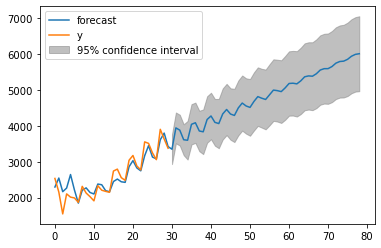

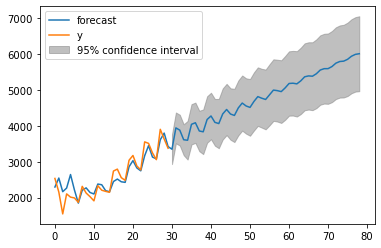

In [89]:
# save finalized model to file
from pandas import read_csv
from statsmodels.tsa.arima_model import ARIMA
import numpy
# load data
train = read_csv('dataset2.csv', header=0, index_col=0, parse_dates=True)
# prepare data
X = train.values
X = X.astype('float32')
# fit model
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1, 79)

In [90]:
# Error on the test data
val=pd.read_csv('validation2.csv',header=None)
rmse = sqrt(mean_squared_error(val[1], forecast))
rmse

611.5071293054427

# ARIMA model has the highest rmse score.


# Combining train and test data to build final model


In [92]:
# fit model
wdf = pd.read_excel(r'C:\Users\Saqlain\Downloads\CocaCola_Sales_Rawdata.xlsx',header=0, index_col=0, parse_dates=True)
wdf.head()

,Sales
Quarter,
Q1_86,1734.827000
Q2_86,2244.960999
Q3_86,2533.804993
Q4_86,2154.962997
Q1_87,1547.818996


In [93]:
#Converting the 'Month' column into proper date time format
dates = pd.date_range(start='1949-01-01', freq='MS',periods=len(wdf))

In [94]:
wdf['Date'] = dates
wdf.set_index('Date',inplace=True)

In [95]:
# prepare data
X = wdf.values
X = X.astype('float32')

In [96]:
#model fitting
model = ARIMA(X, order=(3,1,0))
model_fit = model.fit()

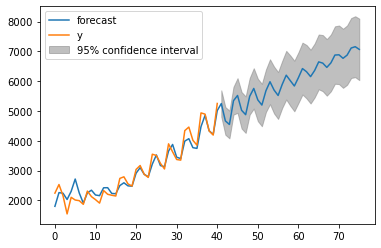

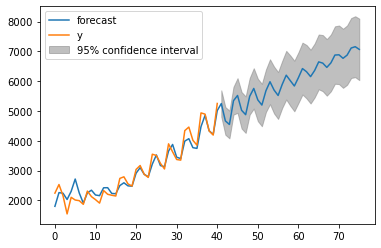

In [97]:
#prediction
forecast=model_fit.forecast(steps=10)[0]
model_fit.plot_predict(1,76)

In [98]:
forecast

array([5249.54464728, 4667.82462245, 4548.21700713, 5345.01474735,
       5520.50507598, 5023.90112718, 4877.35967489, 5494.98953243,
       5757.70902718, 5371.73065224])

# Insight:
- The dataset was normaly distributed with log transformation.
- In model based approaches Additive seasionality quadratic gave the least rmse scores
- In Data driven approaches Holts winter Exponential smoothing with Multiplicative trend and additive seasonality gave the least
rmse score.
- With ARIMA model we had the highest rmse score.